## Universal Representation Theorem - Gradient Descent Optimisation

Here we study the possibility to represent functions with a MLP with a single hidden layer (n1 hidden units).
As activation functions, we use the sigmoid ('logit') function.

Then, we generate training data - by assuming a function on the unit interval [0,1]. Here, we provide to families of functions:
* Beta distribution function: $b_{\alpha,\beta}(x)=x^\alpha\cdot(1-x)^\beta$
* Sine function: $sin_\omega(x)=\sin(2\pi\omega\cdot x)$

Finally, we use mini-batch-gradient descent to minimize MSE cost.

Goals:
* Learn how a given function can be represented with a single layer MLP;
* Understand that, in principle, it can be learned from sample data;
* Understand that the optimization by using plain gradient (MBGD) is not always straightforward; 
* Experience that the choice of the hyper-parameters number of hidden units, batchsize, learning rate is tricky. 


#### Plot Utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_function(x,y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.show()
    
def plot_compare_function(x,y1,y2, label1='', label2=''):
    plt.plot(x, y1, label=label1)
    plt.xlabel('x')
    plt.plot(x, y2, label=label2)
    if label1 and label2:
        plt.legend()
    plt.show()


### Model

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [3]:
def predict(X,W1,b1,W2,b2):
    """
    Computes the output for the single hidden layer network (n1 units) with 1d input and 1d output.
    
    Arguments:
    W1 -- weights of the hidden layer with shape (n1,1)
    b1 -- biases of the hidden units with shape (n1,1)
    W2 -- weights of the output layer with shape (1,n1)
    b2 -- bias of the output
    X  -- input data with m samples and shape (1,m)
    
    Returns:
    A2 -- Output from the network of shape (1,m) 
    
    """
    
    ### START YOUR CODE ###
    A1 = np.add(np.dot(W1,X),b1)
    A1 = sigmoid(A1)
    A2 = np.add(np.dot(W2,A1),b2)
    ### END YOUR CODE ###
    
    return A2

#### TEST - Prediction

In [4]:
W1 = np.array([0.4,0.2,-0.4]).reshape(3,1) # n1 = 3
b1 = np.array([0.1,0.1,0.1]).reshape(3,1)
W2 = np.array([1,2,1]).reshape(1,3)
b2 = -1
X = np.linspace(-1,1,5).reshape((1,5))
Ypred = predict(X,W1,b1,W2,b2)
Yexp = np.array([0.99805844, 1.04946333, 1.09991675, 1.14913132, 1.19690185]).reshape(1,5)
np.testing.assert_array_almost_equal(Ypred,Yexp,decimal=8)

#### Cost

In [5]:
def cost(X,Y,W1,b1,W2,b2):
    """
    Computes the MSE cost for a single hidden layer network with 1d input and 1d output.
    Uses the predict function defined above.
    
    Arguments:
    W1 -- weights of the hidden layer with shape (n1,1)
    b1 -- biases of the hidden units with shape (n1,1)
    W2 -- weights of the output layer with shape (1,n1)
    b2 -- bias of the output
    X -- input data with shape (1,m)
    Y -- labels with shape (1,m) 
    
    Returns:
    cost -- the MSE cost divided by 2.
    """
    ### START YOUR CODE ###
    m = X.shape[1]
    yhat = predict(X,W1,b1,W2,b2)
    
    error = np.power(np.subtract(Y, yhat),2)
    cost = np.divide(np.sum(error), (2 * m))
    
    ### END YOUR CODE ###
    return cost

#### TEST - Cost

In [6]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.linspace(-1,1,5).reshape(1,5)
Y = 2.0*np.ones(5).reshape(1,5)
c = cost(X,Y,W1,b1,W2,b2)
cexp = 9.01669099
np.testing.assert_almost_equal(c,cexp,decimal=8)

#### Gradient

In [7]:
def gradient(W1,b1,W2,b2,X,Y):
    """
    Computes the gradient of the MSE cost for a single hidden layer network with 1d input and 1d output.
    The parts of the gradient associated with the weights array and bias array for the hidden layer, 
    the weights array and the bias for the output layer are provided as separate numpy arrays of according 
    dimension. 
    
    Arguments:    
    W1 -- weights of hidden layer with shape (n1,1)
    b1  -- biases of hidden layer with shape (n1,1)
    W2 -- weights of output layer with shape (1,n1)
    b2  -- biases of output layer
    X  -- input data with shape (1,m)
    Y  -- labels with shape (1,m)
    
    Returns:
    gradient -- dictionary with the gradients w.r.t. W1, W2, b1, b2 and according keys 
                'dW1' with shape (n1,1)
                'db1' with shape (n1,1)
                'dW2' with shape (1,n1)
                'db2' a scalar
    """
    ### START YOUR CODE ###
    
    m = X.shape[1]
    Yhat = predict(X, W1, b1, W2, b2)
    sig = sigmoid(W1*X+b1)
    
    dW1 = (1/m) * W2.T * np.sum((Yhat-Y) * sig * (1-sig) * X, axis=1).reshape(W1.shape)
    dW2 = (1/m) * np.sum((Yhat-Y) * sig, axis=1).reshape(W2.shape)
    db1 = (1/m) * W2.T * np.sum((Yhat-Y) * sig * (1-sig), axis=1).reshape(b1.shape)
    db2 = (1/m) * np.sum(Yhat-Y)
    
    ### END YOUR CODE ###
    
    return {'dW1':dW1, 'dW2':dW2, 'db1':db1, 'db2':db2}

#### TEST - Gradient

In [8]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.array([1,2,3,4,5,6,7]).reshape((1,7))
Y = np.array([2,2,2,2,2,2,2]).reshape((1,7))
gradJ = gradient(W1,b1,W2,b2,X,Y)
dW1exp = np.array([0.00590214,0.00427602,0.00234663]).reshape(W1.shape)
db1exp = np.array([0.00579241,0.004247,0.00234079]).reshape(b1.shape)
dW2exp = np.array([5.99209251,5.99579451,5.99714226]).reshape(W2.shape)
db2exp = 5.99792323
np.testing.assert_array_almost_equal(gradJ['dW1'],dW1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['db1'],db1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['dW2'],dW2exp,decimal=8)
np.testing.assert_almost_equal(gradJ['db2'],db2exp,decimal=8)

#### Training Loop

In [9]:
def train(X,Y,n1,nepochs,batchsize=32,learning_rate=0.1):
    """
    Performs the training by using MBGD for a MLP with a single hidden layer (n1 units) and 1d input and output layer.
    
    It starts with initializing the parameters:
    * the weights and the biases for the hidden units : W1,b1 of shape (n1,1) 
    * the weights and the bias for the output layer: W2 of shape (1,n1) and scalar b2 

    Then, it loops over the epochs and per epoch over the mini-batches. The number of batches is determined from the 
    batchsize.
    """
    # initialize weights
    W1 = np.random.uniform(-1,1,n1).reshape(n1,1)*0.05
    b1 = np.zeros((n1,1),dtype='float')
    W2 = np.random.uniform(-1,1,n1).reshape(1,n1)*0.05
    b2 = 0.0
    
    m = X.shape[1]
    mb = int(m/batchsize)
    indices = np.arange(m)
    #np.random.shuffle(indices)
    
    # remember the epoch id and cost after each epoch for constructing the learning curve at the end
    costs = [] 
    epochs = []

    # Initial cost value:
    epochs.append(0)
    costs.append(cost(X,Y,W1,b1,W2,b2)) 
    
    # training loop
    for epoch in range(nepochs):
        
        ### START YOUR CODE ###
        
        X = np.random.permutation(X.T).T #works also for Matrix, shuffles tuples! but it's slow
        Y = np.random.permutation(Y.T).T
        
        for j in range(0,m,batchsize):
            Xtrain = X[:, j:j+batchsize]
            Ytrain = Y[:, j:j+batchsize]
            
            updates = gradient(W1,b1,W2,b2,Xtrain,Ytrain)
            W1 = W1 - learning_rate * updates["dW1"]
            b1 = b1 - learning_rate * updates["db1"]
            W2 = W2 - learning_rate * updates["dW2"]
            b2 = b2 - learning_rate * updates["db2"]
        print("train-test:", "epoch",epoch,"j:",j,"W1.shape",W1.shape, "Xtrain.shape",Xtrain.shape)
        
        ### END YOUR CODE ###
        epochs.append(epoch+1)
        costs.append(cost(X,Y,W1,b1,W2,b2))        
        print("costs[-1]:",costs[-1])
        
    print(costs[-1])    
    params = {'W1':W1, 'W2':W2,'b1':b1,'b2':b2}    
    return params, np.array(epochs), np.array(costs)

In [10]:
# Proof of randomization (while keeping tuples intact)
Y = np.arange(18).reshape(2,9)
print(Y)
Y = np.random.permutation(Y.T).T
print(Y)

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]]
[[ 0  5  7  3  2  8  4  1  6]
 [ 9 14 16 12 11 17 13 10 15]]


#### TEST - No simple test for the training loop....

### Generation of the Training Data 

In [11]:
def beta_fct(x,alpha,beta):
    """
    Parameters:
    x - input array
    alpha, beta -- larger values lead to more pronounced peaks
    """
    c = alpha/(alpha+beta)
    norm = c**alpha*(1-c)**beta
    return x**alpha*(1-x)**beta/norm

In [12]:
def sin_fct(x,omega):
    """
    Parameters:
    x -- input array
    omega -- frequency (~number of cycles within the unit interval)
    """
    return np.sin(x*2*np.pi*omega)

In [13]:
def generate_inputs(m, func, random=True, vargs=None):
    """
    Generates m (x,y=f(x))-samples by either generating random x-values in the unit interval (random=True) or by 
    generating a grid of such values. Then the y values (used as labels below) are created from the function object 
    `func`.
    Parameter needed to define the function `func` can be passed as vargs-dict. 
    """
    if random:
        x = np.random.rand(1,m)
        y = func(x, **vargs)
    else:
        x = np.linspace(0,1,m).reshape(1,m)
        y = func(x,**vargs)
    return x,y

In [14]:
m = 1000
func = beta_fct
vargs={'alpha':2.0,'beta':2.0}
#func = sin_fct
#vargs={'omega':3.0}

X,Y = generate_inputs(m,func,vargs=vargs)

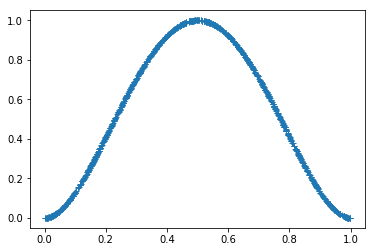

In [15]:
plt.plot(X[0,:],Y[0,:],'+')

### Normalize the Input and Output

It turns out that it is important to normalize the input and the output data here.
Remember the mu's and sigma's so that you can also apply it to the test data below!

In [16]:
def normalize(X, mu=None, stdev=None):
    """
    Normalizes the data X. If not provided, mu and sigma is computed.
    
    Returns:
    X1 -- normalized data (array of the same shape as input)
    mu -- mean
    stdev -- standard deviation
    """
    ### START YOUR CODE ###
    m = X.shape[1] 

    if mu == None:
        mu = np.mean(X)
        
    if np.sum(X - mu) == 0:
        stdev = 1
    
    if stdev == None:
        stdev = np.sqrt(1/m * np.sum(X - mu)**2)
                        
    X1 = (X - mu)/ stdev
                        
    ### END YOUR CODE ###
    
    return X1,mu,stdev

In [17]:
def inv_normalize(X1, mu, stdev):
    """
    Invert the normalization.

    Returns:
    X -- unnormalized data (array of the same shape as input X1)
    """
    ### START YOUR CODE ###
    
    X = X1*stdev + mu
    
    ### END YOUR CODE ###
    
    return X

In [18]:
# Input Normalization (average muX and standard deviation stdevX)
X1, muX, stdevX = normalize(X)

# Output Normalization (average muY and standard deviation stdevY)
Y1, muY, stdevY = normalize(Y)

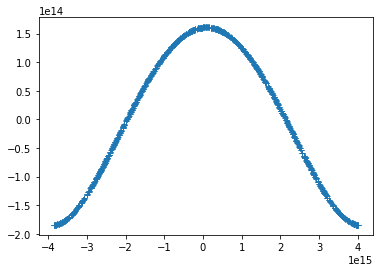

In [19]:
plt.plot(X1[0,:],Y1[0,:],'+')

### Perform the Training

train-test: epoch 0 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.323187080869427e+27
train-test: epoch 1 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.410659658096944e+27
train-test: epoch 2 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.454415511741299e+27
train-test: epoch 3 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.283368122510573e+27
train-test: epoch 4 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.245693277273244e+27
train-test: epoch 5 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.212369678759774e+27
train-test: epoch 6 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.264429580238723e+27
train-test: epoch 7 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.361907484780934e+27
train-test: epoch 8 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.280345901516465e+27
train-test: epoch 9 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.271117712723717e+27
train-test: epoch 10

costs[-1]: 7.225233936385268e+27
train-test: epoch 90 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.297159920876356e+27
train-test: epoch 91 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.219598325695148e+27
train-test: epoch 92 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.241266965555769e+27
train-test: epoch 93 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.366159162902088e+27
train-test: epoch 94 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.306902880785748e+27
train-test: epoch 95 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.219237148912798e+27
train-test: epoch 96 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.246479796525837e+27
train-test: epoch 97 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.251477371864049e+27
train-test: epoch 98 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.200477646504353e+27
train-test: epoch 99 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]:

train-test: epoch 178 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.236746818692891e+27
train-test: epoch 179 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.409265859100726e+27
train-test: epoch 180 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.277409367273908e+27
train-test: epoch 181 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.1930106774225e+27
train-test: epoch 182 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.197125825511994e+27
train-test: epoch 183 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.25753784833993e+27
train-test: epoch 184 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.36358454996933e+27
train-test: epoch 185 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.299769796599533e+27
train-test: epoch 186 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.189342243056102e+27
train-test: epoch 187 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.389627636867349e+27
trai

costs[-1]: 7.229090202469554e+27
train-test: epoch 262 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.197123023102901e+27
train-test: epoch 263 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.335351979498288e+27
train-test: epoch 264 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.214598190252334e+27
train-test: epoch 265 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.481734468547127e+27
train-test: epoch 266 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.267681456944978e+27
train-test: epoch 267 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.351081426035937e+27
train-test: epoch 268 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.251545189494784e+27
train-test: epoch 269 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.206849267625824e+27
train-test: epoch 270 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.2130270781518e+27
train-test: epoch 271 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
co

costs[-1]: 7.239257984208327e+27
train-test: epoch 346 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.266379287242441e+27
train-test: epoch 347 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.198352372186684e+27
train-test: epoch 348 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.275506659497227e+27
train-test: epoch 349 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.20542840755713e+27
train-test: epoch 350 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.193194706722811e+27
train-test: epoch 351 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.222166344145108e+27
train-test: epoch 352 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.353921022320059e+27
train-test: epoch 353 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.196117111021769e+27
train-test: epoch 354 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.203687325467862e+27
train-test: epoch 355 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
c

costs[-1]: 7.243231502308841e+27
train-test: epoch 430 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.198046517398241e+27
train-test: epoch 431 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.195090252635899e+27
train-test: epoch 432 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.309309322016999e+27
train-test: epoch 433 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.567045296564064e+27
train-test: epoch 434 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.410882644590428e+27
train-test: epoch 435 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.217841227157335e+27
train-test: epoch 436 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.385448311906601e+27
train-test: epoch 437 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.33585513654161e+27
train-test: epoch 438 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.262192424476763e+27
train-test: epoch 439 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
c

costs[-1]: 7.182332432386181e+27
train-test: epoch 513 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.248437626822993e+27
train-test: epoch 514 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.203330219257656e+27
train-test: epoch 515 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.266563143063349e+27
train-test: epoch 516 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.22568404525818e+27
train-test: epoch 517 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.232610875599191e+27
train-test: epoch 518 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.222352548316206e+27
train-test: epoch 519 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.202513673433824e+27
train-test: epoch 520 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.345653562667388e+27
train-test: epoch 521 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.228252536760559e+27
train-test: epoch 522 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
c

train-test: epoch 604 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.380652237139006e+27
train-test: epoch 605 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.205507704583287e+27
train-test: epoch 606 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.206629217914302e+27
train-test: epoch 607 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.245165896626699e+27
train-test: epoch 608 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.242121501116286e+27
train-test: epoch 609 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.282686347730266e+27
train-test: epoch 610 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.260193385160291e+27
train-test: epoch 611 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.259333574441838e+27
train-test: epoch 612 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.232768974637242e+27
train-test: epoch 613 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.24189494892676e+27
t

train-test: epoch 689 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.213806487263548e+27
train-test: epoch 690 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.240627086170105e+27
train-test: epoch 691 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.248024196477805e+27
train-test: epoch 692 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.35181299677895e+27
train-test: epoch 693 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.237906757130944e+27
train-test: epoch 694 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.27160053821032e+27
train-test: epoch 695 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.296002174732036e+27
train-test: epoch 696 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.280150805918052e+27
train-test: epoch 697 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.20965676072062e+27
train-test: epoch 698 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.321825284810235e+27
tra

costs[-1]: 7.157626839315485e+27
train-test: epoch 781 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.233574161027757e+27
train-test: epoch 782 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.326260498305047e+27
train-test: epoch 783 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.252297606403705e+27
train-test: epoch 784 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.752985364817162e+27
train-test: epoch 785 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.307011796104736e+27
train-test: epoch 786 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.192159053795503e+27
train-test: epoch 787 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.479532102332501e+27
train-test: epoch 788 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.441172693751492e+27
train-test: epoch 789 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.22053260514606e+27
train-test: epoch 790 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
c

costs[-1]: 7.197466673491019e+27
train-test: epoch 866 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.3052761143576e+27
train-test: epoch 867 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.208952583632134e+27
train-test: epoch 868 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.432780110715934e+27
train-test: epoch 869 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.23175284842535e+27
train-test: epoch 870 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.217945160976368e+27
train-test: epoch 871 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.196473815115167e+27
train-test: epoch 872 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.422981037594511e+27
train-test: epoch 873 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.192904829124987e+27
train-test: epoch 874 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.198249932979344e+27
train-test: epoch 875 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
cos

costs[-1]: 7.201086540769301e+27
train-test: epoch 952 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.234360548962749e+27
train-test: epoch 953 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.268772264587806e+27
train-test: epoch 954 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.200867476260607e+27
train-test: epoch 955 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.308145689627436e+27
train-test: epoch 956 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.233668558848202e+27
train-test: epoch 957 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.225314504612881e+27
train-test: epoch 958 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.276458895332224e+27
train-test: epoch 959 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.418956950133223e+27
train-test: epoch 960 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)
costs[-1]: 7.222052719968989e+27
train-test: epoch 961 j: 975 W1.shape (10, 1) Xtrain.shape (1, 25)


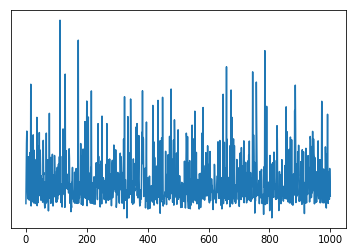

In [20]:
# Use the normalized inputs and outputs
n1 = 10 # number of hidden units
nepochs = 1000 # number of epochs
batchsize = 25 #32
learning_rate = 0.1

### START YOUR CODE ###
params, epochs, costs = train(X1,Y1,n1,nepochs,batchsize,learning_rate)
#print(params,epochs,costs)
### END YOUR CODE ###

plt.semilogy(epochs,costs)

[[0.99805844 1.04946333 1.09991675 1.14913132 1.19690185]] [[0.00000000e+00 1.59999679e-05 6.38716797e-05 1.43423137e-04
  2.54462725e-04 3.96799218e-04 5.70241772e-04 7.74599931e-04
  1.00968362e-03 1.27530317e-03 1.57126926e-03 1.89739298e-03
  2.25348581e-03 2.63935960e-03 3.05482659e-03 3.49969941e-03
  3.97379108e-03 4.47691499e-03 5.00888493e-03 5.56951507e-03
  6.15861995e-03 6.77601453e-03 7.42151413e-03 8.09493446e-03
  8.79609163e-03 9.52480210e-03 1.02808828e-02 1.10641508e-02
  1.18744240e-02 1.27115203e-02 1.35752580e-02 1.44654561e-02
  1.53819337e-02 1.63245103e-02 1.72930059e-02 1.82872409e-02
  1.93070360e-02 2.03522122e-02 2.14225911e-02 2.25179946e-02
  2.36382448e-02 2.47831646e-02 2.59525769e-02 2.71463051e-02
  2.83641730e-02 2.96060049e-02 3.08716253e-02 3.21608592e-02
  3.34735319e-02 3.48094692e-02]]
Ypred [2.99140124 2.99558064 2.99977492 3.00398411 3.00820824 3.01244733
 3.01670141 3.0209705  3.02525463 3.02955383 3.03386811 3.03819751
 3.04254205 3.04690175 

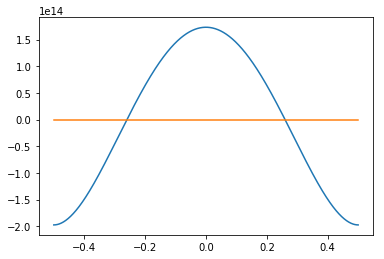

In [21]:
mtest = 1000
Xtest,Ytest = generate_inputs(mtest, func, random=False, vargs=vargs)
print(Ypred[:,:50],Ytest[:,:50])
# Do the prediction with the trained model

### START YOUR CODE ###

Xtest, muX, stdevX = normalize(Xtest)
Ytest, muY, stdevY = normalize(Ytest)
Ypred = predict(Xtest,W1,b1,W2,b2)
print("Ypred",Ypred[0][:50])
print("Ytest",Ytest[0][:50])
### END YOUR CODE ###


plt.plot(Xtest[0,:],Ytest[0,:])
plt.plot(Xtest[0,:],Ypred[0,:])
